In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

dataset = pd.read_csv('Fish.csv')
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:

dataset['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [13]:
data = dataset.drop(columns=['Species'])
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Weight'] = scaler.fit_transform(data[['Weight']])
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1.955110e-17,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.003160e+00,9.996441,10.716328,11.610246,4.286208,1.685804
min,-1.116227e+00,7.500000,8.400000,8.800000,1.728400,1.047600
25%,-7.799517e-01,19.050000,21.000000,23.150000,5.944800,3.385650
50%,-3.512011e-01,25.200000,27.300000,29.400000,7.786000,4.248500
75%,7.052627e-01,32.700000,35.500000,39.650000,12.365900,5.584500
max,3.507554e+00,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:

from sklearn.cluster import KMeans

In [16]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

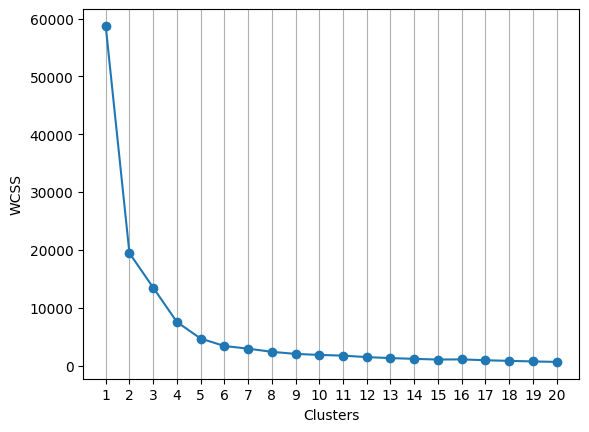

In [18]:

plt.plot([i for i in range(1,21)], wcss, marker='o')
plt.xlabel('Clusters')
plt.xticks([i for i in range(1,21)])
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show() 

In [19]:
kmeans = KMeans(n_clusters=6)
data['Prediction'] = kmeans.fit_predict(data)
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Prediction
0,-0.438072,23.2,25.4,30.0,11.5200,4.0200,5
1,-0.303562,24.0,26.3,31.2,12.4800,4.3056,5
2,-0.163448,23.9,26.5,31.1,12.3778,4.6961,5
3,-0.098995,26.3,29.0,33.5,12.7300,4.4555,5
4,0.088759,26.5,29.0,34.0,12.4440,5.1340,5


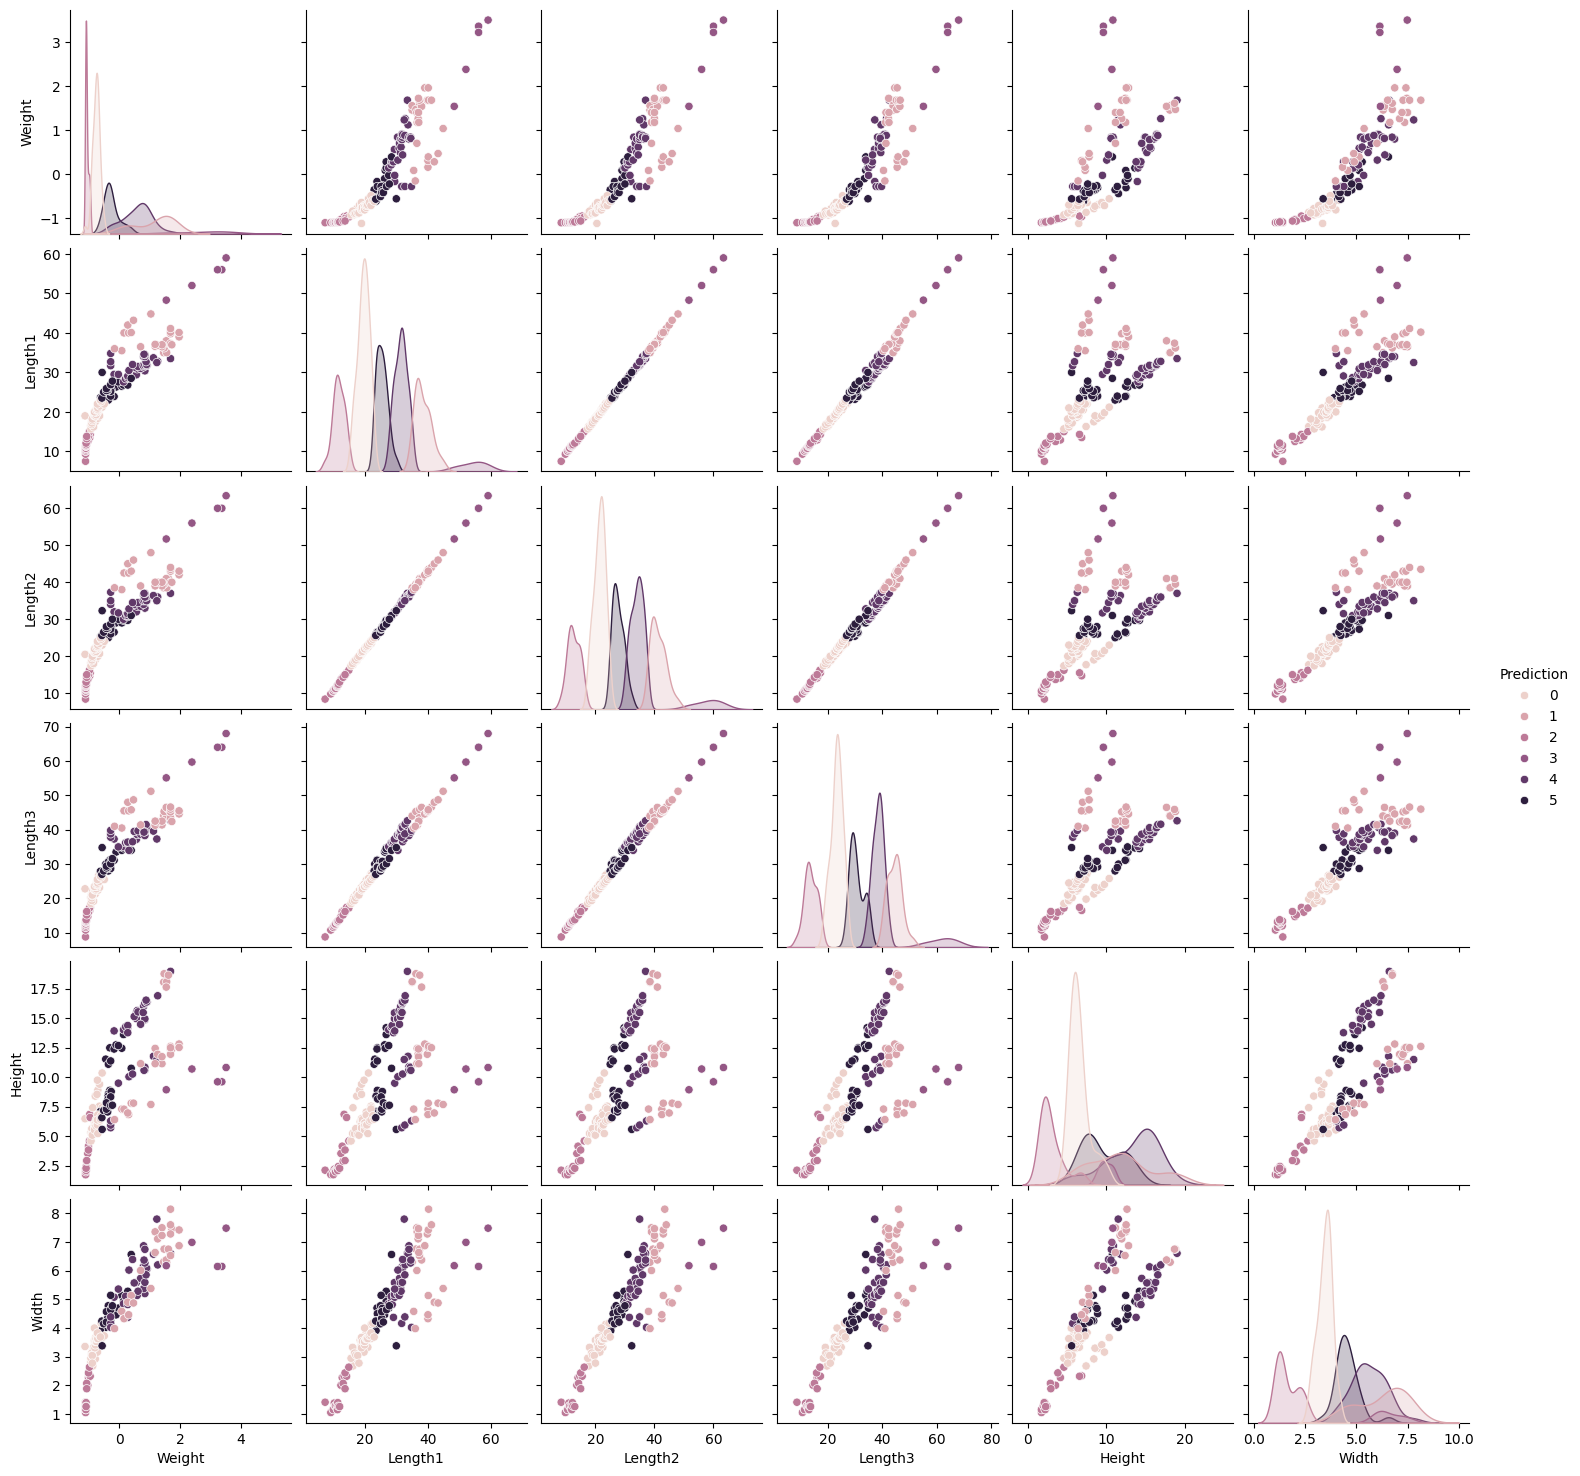

In [20]:

sns.pairplot(data=data, hue='Prediction')
plt.show()

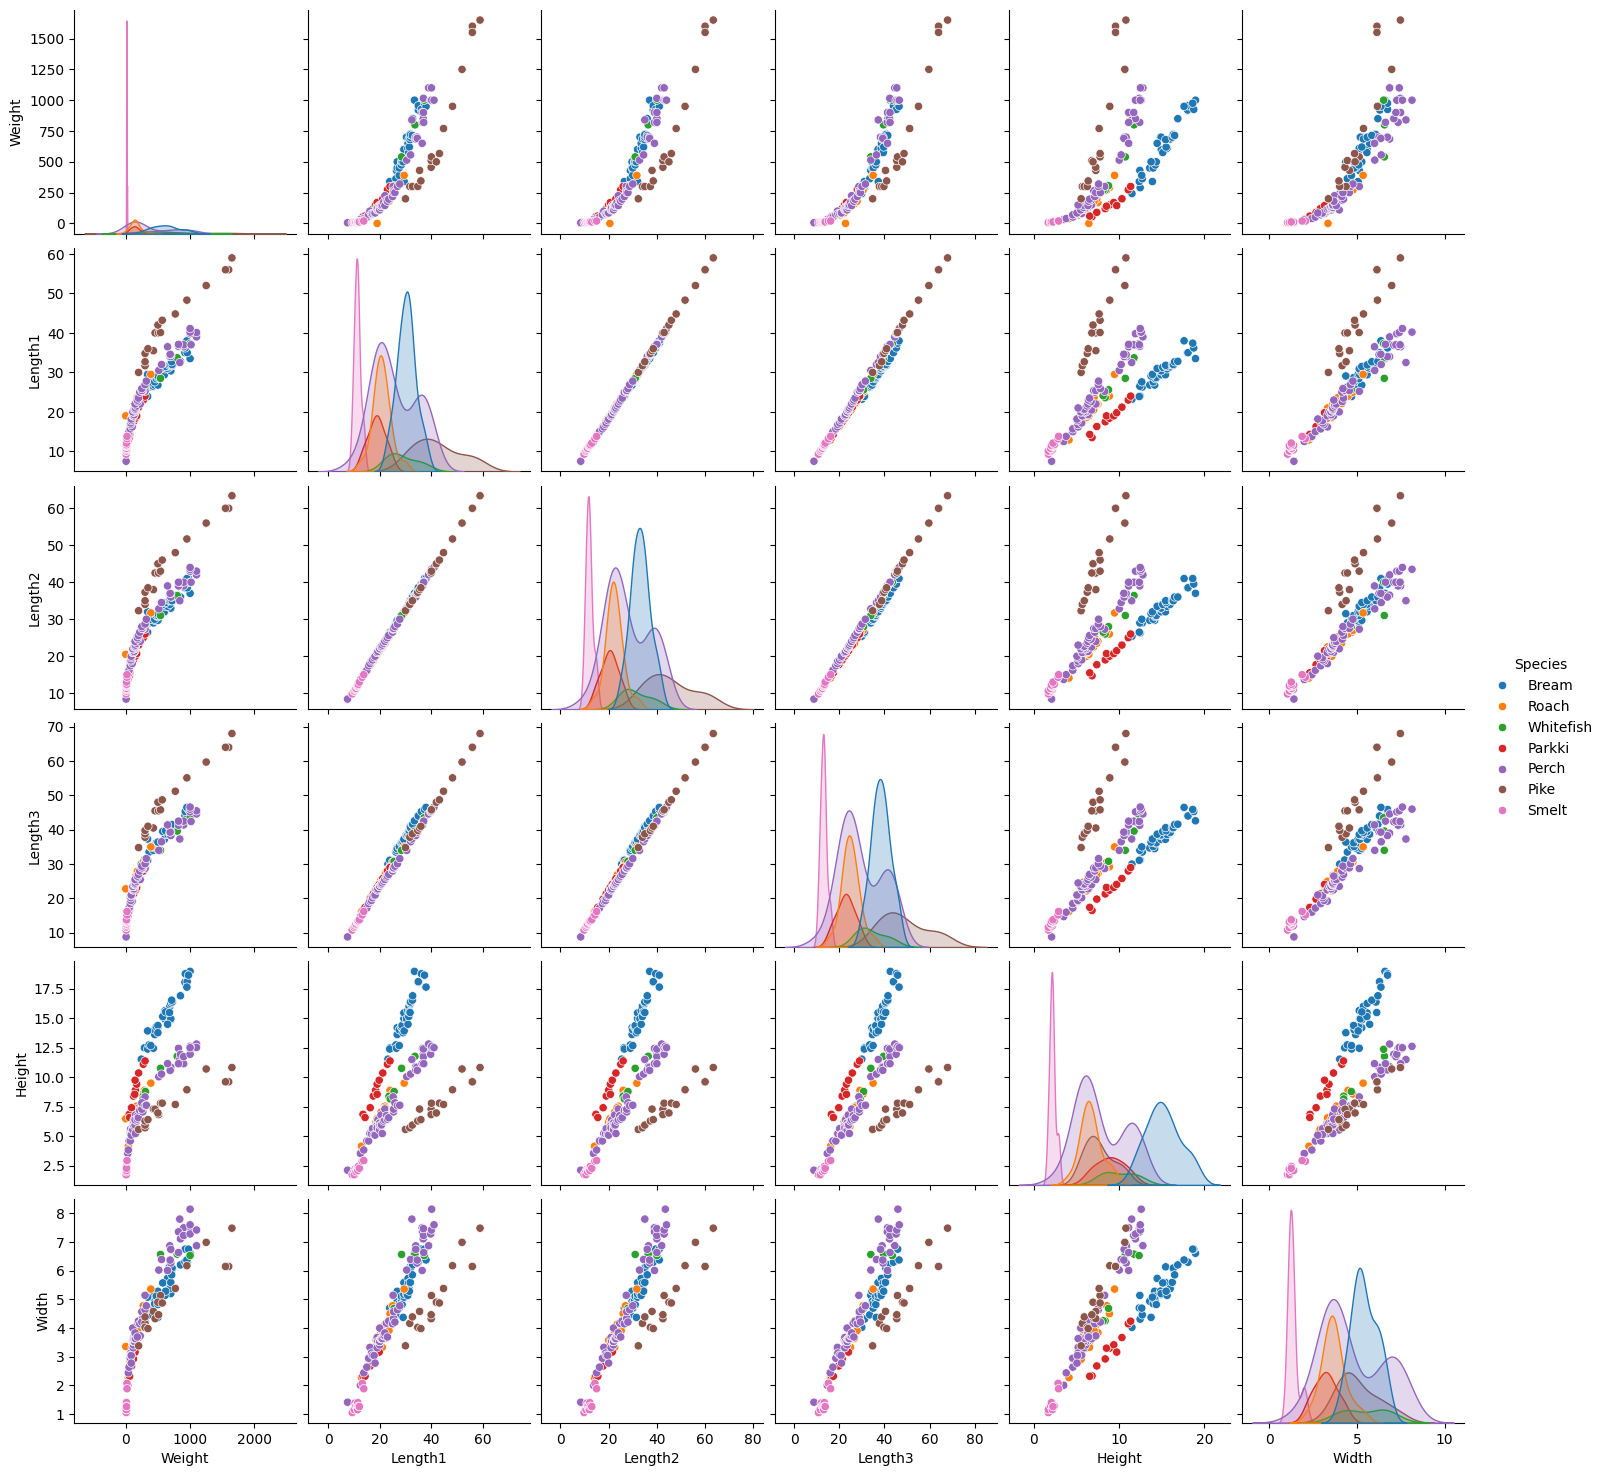

In [12]:

sns.pairplot(data=dataset, hue='Species')
plt.show() 